In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def l_1(x,y):
    return np.sum(abs(x-y),axis=0)
def l_2(x,y):
    return np.sum((x-y)**2,axis=0)
def l_infty(x,y):
    return np.max(abs(x-y),axis=0)

In [3]:
def nnClassifier(vecX,matX,vecY,metric):
    return vecY[np.argmin(metric(matX,vecX))]

In [4]:
def x_classifier(X,f):
    X_prime=X.copy()
    return np.apply_along_axis(f,0,X_prime)

In [5]:
def show_pic(x,y,metrics,f,maxcord=151):
    fig, axs = plt.subplots(1,len(metrics)+1,dpi=maxcord)
    x_in=y_in=maxcord
    elements=x_in*y_in
    l=np.array([[(0,0,0) for x in range(x_in)]for y in range(y_in)])
    lc=np.array([[(0,0,0) for x in range(x_in)]for y in range(y_in)])
    for cx in range(x_in):
        for cy in range(y_in):
            color=f([cx,cy])
            lc[cy][cx]=(255*color,0,0)
    axs[-1].imshow(lc,origin='lower')
    for i in range(len(metrics)):
        for cx in range(x_in):
            for cy in range(y_in):
                color=nnClassifier(np.array([[cx],[cy]]),x,y,metrics[i])
                l[cy][cx]=(255*color,0,0)
        print("Accuracy:",((l==lc).sum()-2*elements)/elements)
        axs[i].imshow(l,origin='lower')  
    plt.show()

In [6]:
n_samples=200
maxcord=151

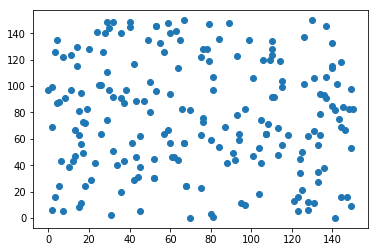

In [7]:
X=np.random.randint(0,maxcord,size=(2,n_samples))
plt.scatter(X[0,:],(X[1,:]))
plt.show()

# Y based on $l_1$
This should be a diamond.

In [8]:
f_1=lambda x:(abs(x[0]-maxcord/2)+abs(x[1]-maxcord/2)>=50)

Accuracy: 0.9497390465330467
Accuracy: 0.9536862418314986


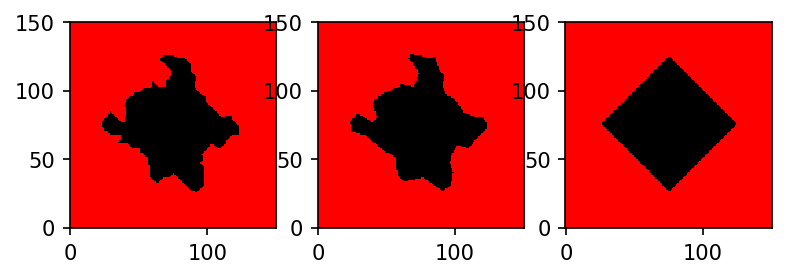

In [9]:
show_pic(X,x_classifier(X,f_1),[l_1,l_2],f_1)

Accuracy: 0.9497390465330467
Accuracy: 0.955966843559493


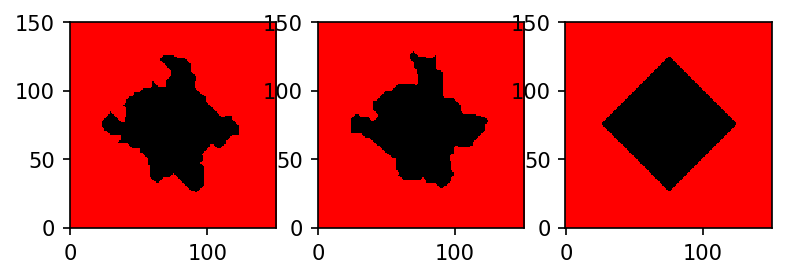

In [10]:
show_pic(X,x_classifier(X,f_1),[l_1,l_infty],f_1)

# Y based on $l_2$
This should be a circle.

In [11]:
f_2=lambda x:(abs(x[0]-maxcord/2)**2+abs(x[1]-maxcord/2)**2>=2500)

Accuracy: 0.9487303188456646
Accuracy: 0.9515810710056577


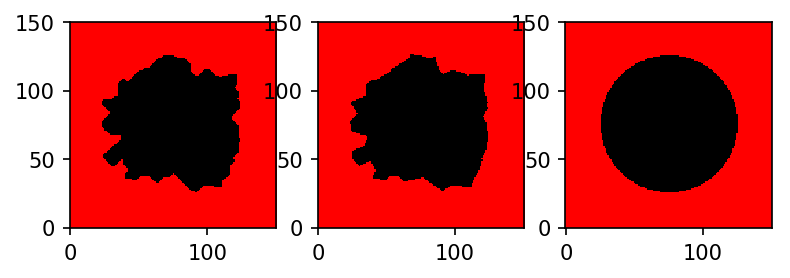

In [12]:
show_pic(X,x_classifier(X,f_2),[l_1,l_2],f_2)

Accuracy: 0.9487303188456646
Accuracy: 0.9508354896715057


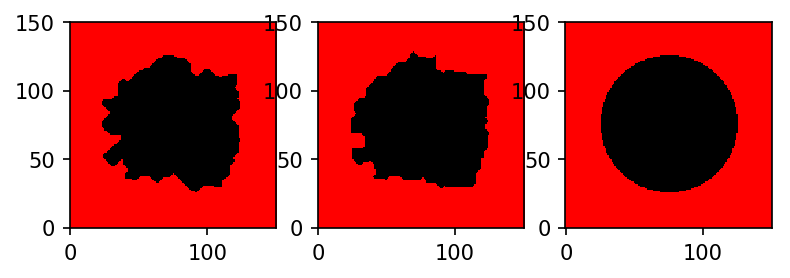

In [13]:
show_pic(X,x_classifier(X,f_2),[l_1,l_infty],f_2)

# Y based on $l_\infty$
This should be a square.

In [14]:
f_infty=lambda x:max(abs(x[0]-maxcord/2),abs(x[1]-maxcord/2))>=50

Accuracy: 0.9417130827595281
Accuracy: 0.942941099074602


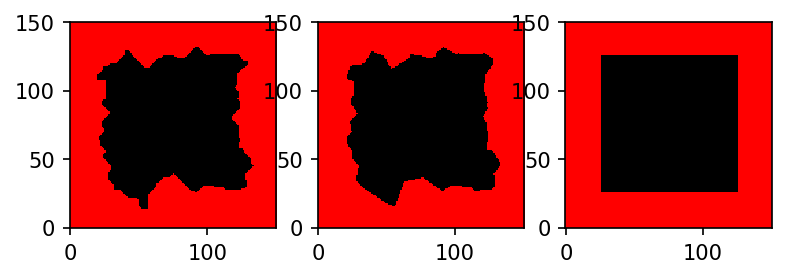

In [15]:
show_pic(X,x_classifier(X,f_infty),[l_1,l_2],f_infty)

Accuracy: 0.9417130827595281
Accuracy: 0.9409675014253761


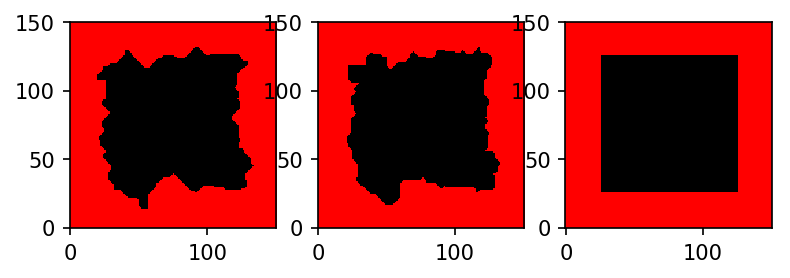

In [16]:
show_pic(X,x_classifier(X,f_infty),[l_1,l_infty],f_infty)

# Mixed Y

In [17]:
f_1_2=lambda x:(abs(x[0]-maxcord/2)+abs(x[1]-maxcord/2)<=25) or (abs(x[0]-maxcord/2)**2+abs(x[1]-maxcord/2)**2>=2500)

Accuracy: 0.9317573790623218
Accuracy: 0.9375904565589228


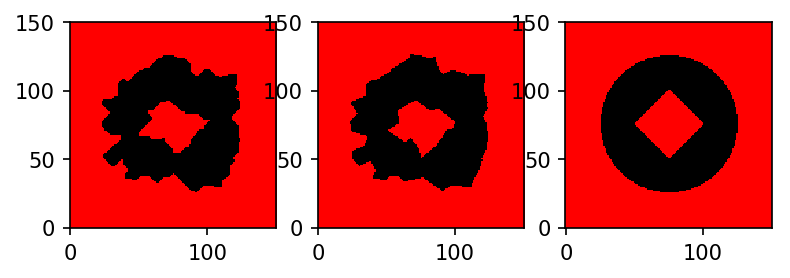

In [18]:
show_pic(X,x_classifier(X,f_1_2),[l_1,l_2],f_1_2)

Accuracy: 0.9317573790623218
Accuracy: 0.9364501556949256


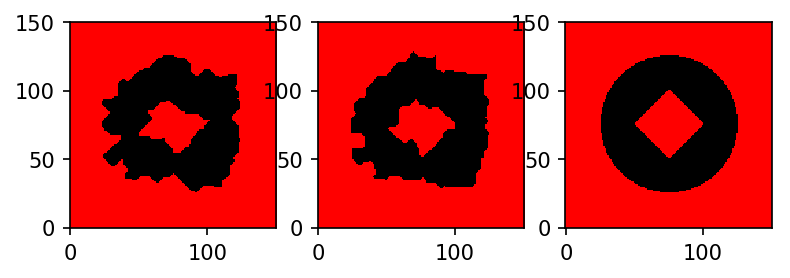

In [19]:
show_pic(X,x_classifier(X,f_1_2),[l_1,l_infty],f_1_2)

----------------------

In [20]:
f_1_infty=lambda x:(abs(x[0]-maxcord/2)+abs(x[1]-maxcord/2)<=25) or max(abs(x[0]-maxcord/2),abs(x[1]-maxcord/2))>=50

Accuracy: 0.9247401429761852
Accuracy: 0.9289504846278672


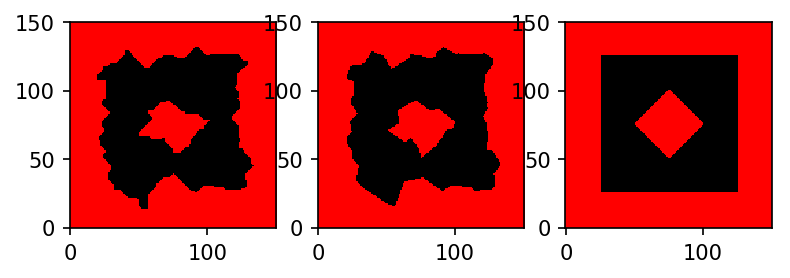

In [21]:
show_pic(X,x_classifier(X,f_1_infty),[l_1,l_2],f_1_infty)

Accuracy: 0.9247401429761852
Accuracy: 0.9265821674487961


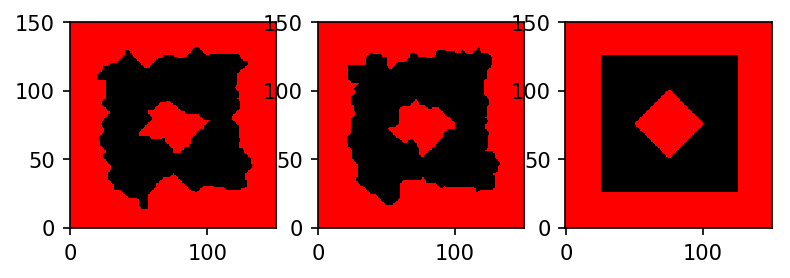

In [22]:
show_pic(X,x_classifier(X,f_1_infty),[l_1,l_infty],f_1_infty)

-----------------
# Worst case

In [23]:
f_mod_2=lambda x:x[0]%7!=0 and x[1]%5!=0

Accuracy: 0.5825183106004123
Accuracy: 0.5755887899653523


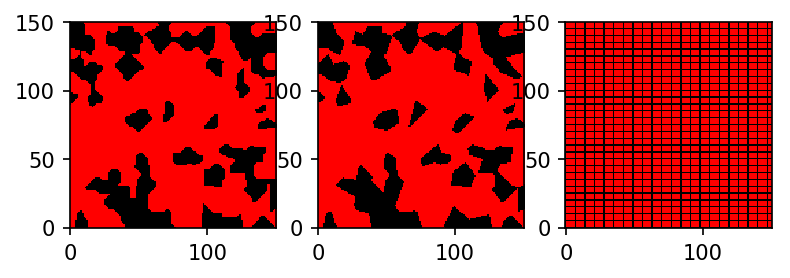

In [24]:
show_pic(X,x_classifier(X,f_mod_2),[l_1,l_2],f_mod_2)

Accuracy: 0.5825183106004123
Accuracy: 0.575281785886584


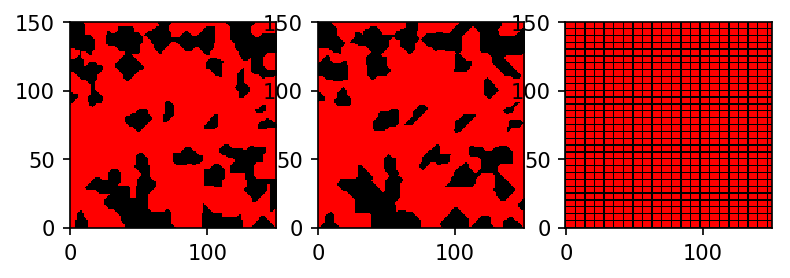

In [25]:
show_pic(X,x_classifier(X,f_mod_2),[l_1,l_infty],f_mod_2)